In [56]:
from numpy import float
import pandas as pd

# Ler CSV
dados = pd.read_csv('/content/DB_Teste.csv', sep = ';', encoding='latin1')

dados['Valor'] = dados['Valor'].str.replace('R\$', '', regex=True)
dados['Valor'] = dados['Valor'].str.replace('\.', '', regex=True)
dados['Valor'] = dados['Valor'].str.replace(',', '.', regex=True)

dados['Valor'] = dados['Valor'].str.strip().astype(float)

dados['Valor'] = dados['Valor'].round(2)


#Construa uma tabela auxiliar que sumarize o valor vendido por cada vendedor, ordenando do maior para o menor
vendedor_sum = dados.groupby('Vendedor')['Valor'].sum().reset_index()
vendedor_sum['Valor'] = vendedor_sum['Valor'].astype(float).round(2)
vendedor_sum = vendedor_sum.sort_values(by='Valor', ascending=False)
print(vendedor_sum)
print (dados)
print(dados.columns)


#Imprima e identifica qual foi o cliente responsável pela venda com maior valor e com menor valor
cliente_maior_valor = dados[dados['Valor'] == dados['Valor'].max()]['ï»¿Cliente'].values[0]
cliente_menor_valor = dados[dados['Valor'] == dados['Valor'].min()]['ï»¿Cliente'].values[0]
print(f"Cliente com a maior venda: {cliente_maior_valor}")
print(f"Cliente com a menor venda: {cliente_menor_valor}")

#Imprima valor médio por Tipo de venda (Serviços, Licenciamento, Produtos)
media_tipo = dados.groupby('Tipo')['Valor'].mean().round(2)
print("Valor médio por tipo de venda:")
print(media_tipo)

#Imprima o número de vendas realizada por cliente
vendas_cliente = dados['ï»¿Cliente'].value_counts().round(2)
print("Número de vendas realizadas por cliente:")
print(vendas_cliente)


       Vendedor         Valor
22   Vendedor 3  1.662205e+08
27   Vendedor 7  5.779918e+07
1   Vendedor 10  5.221206e+07
28   Vendedor 8  4.727451e+07
0    Vendedor 1  3.092948e+07
29   Vendedor 9  2.637456e+07
4   Vendedor 13  2.483730e+07
9   Vendedor 18  2.266230e+07
21  Vendedor 29  1.907687e+07
24   Vendedor 4  1.734682e+07
5   Vendedor 14  7.558042e+06
12  Vendedor 20  7.520907e+06
10  Vendedor 19  6.513184e+06
11   Vendedor 2  5.673761e+06
7   Vendedor 16  4.879238e+06
26   Vendedor 6  3.548887e+06
20  Vendedor 28  3.307138e+06
3   Vendedor 12  3.019669e+06
14  Vendedor 22  2.150000e+06
13  Vendedor 21  1.943240e+06
15  Vendedor 23  1.941880e+06
2   Vendedor 11  1.221787e+06
8   Vendedor 17  1.133803e+06
25   Vendedor 5  9.139000e+05
16  Vendedor 24  5.839700e+05
23  Vendedor 30  5.154468e+05
19  Vendedor 27  4.200000e+05
18  Vendedor 26  3.840000e+05
6   Vendedor 15  8.650461e+04
17  Vendedor 25  4.053200e+04
     ï»¿Cliente         ID           Tipo Data da Venda      Categoria

<ipython-input-56-06a621f211a5>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import float


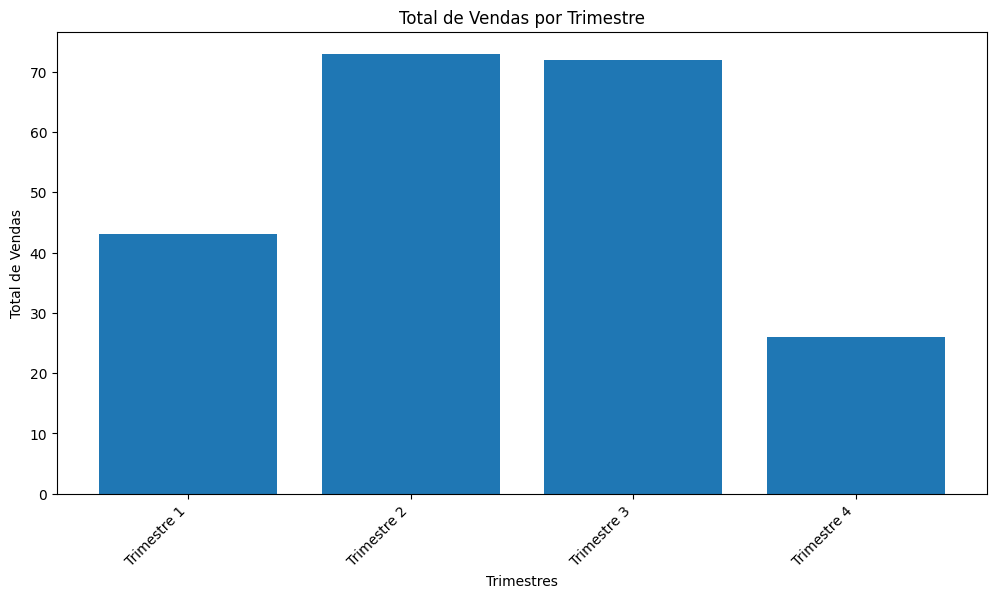

In [52]:
import sqlite3
import matplotlib.pyplot as plt

# Conecte-se ao banco de dados SQLite
conn = sqlite3.connect('sqlite.db')   #banco de dados
cursor = conn.cursor()



# Executar a consulta SQL
consulta_sql = """
SELECT
    strftime('%Y', strftime('%Y-%m-%d', substr(Data_da_Venda, 7, 4) || '-' || substr(Data_da_Venda, 4, 2) || '-' || substr(Data_da_Venda, 1, 2))) AS ano,
    sum(case WHEN strftime('%m', strftime('%Y-%m-%d', substr(Data_da_Venda, 7, 4) || '-' || substr(Data_da_Venda, 4, 2) || '-' || substr(Data_da_Venda, 1, 2))) BETWEEN '01' AND '03' then 1 else 0 end) AS 'Trimestre 1',
    sum(case when strftime('%m', strftime('%Y-%m-%d', substr(Data_da_Venda, 7, 4) || '-' || substr(Data_da_Venda, 4, 2) || '-' || substr(Data_da_Venda, 1, 2))) BETWEEN '04' AND '06' then 1 else 0 end) AS 'Trimestre 2',
    sum(case when strftime('%m', strftime('%Y-%m-%d', substr(Data_da_Venda, 7, 4) || '-' || substr(Data_da_Venda, 4, 2) || '-' || substr(Data_da_Venda, 1, 2))) BETWEEN '07' AND '09' then 1 else 0 end) AS 'Trimestre 3',
    sum(case when strftime('%m', strftime('%Y-%m-%d', substr(Data_da_Venda, 7, 4) || '-' || substr(Data_da_Venda, 4, 2) || '-' || substr(Data_da_Venda, 1, 2))) BETWEEN '10' AND '12' then 1 else 0 end) AS 'Trimestre 4',
	sum(Valor) AS total_vendas
FROM DB_Teste
GROUP BY ano;
"""
cursor.execute(consulta_sql)

# Recuperar os dados
dados = cursor.fetchall()
trimestres = [row[1] for row in dados]
total_vendas = [row[2] for row in dados]
trimestres = ['Trimestre 1', 'Trimestre 2', 'Trimestre 3', 'Trimestre 4']
# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(range(len(trimestres)), total_vendas)
plt.xlabel('Trimestres')
plt.ylabel('Total de Vendas')
plt.title('Total de Vendas por Trimestre')
plt.xticks(range(len(trimestres)), trimestres, rotation=45, ha='right')

# Mostrar o gráfico
plt.show()

# Fechar a conexão com o banco de dados
cursor.close()
conn.close()